# Hyperparameters Tunning for Deep Learning Models (full of errors)
TODO add description

In [1]:
import optuna 
import sys; sys.path.append('..')
from thesis_package import utils, aimodels as myai, metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_trials = 30

c:\Users\jamil\Documents\IST\Thesis\new_thesis\code\AI-to-forecast-constraints-in-the-energy-systems\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## MLP: Classification Dataset

Build optuna study...

[I 2022-09-13 22:06:44,236] A new study created in memory with name: no-name-c9e2a371-d8de-4ec8-a076-3d40fd7dce65
[I 2022-09-13 22:12:57,868] Trial 0 finished with value: 0.1288759055241888 and parameters: {'hidden_size': 58, 'n_layers': 1, 'dropout': 0.44884552469922795, 'activation': 'relu', 'optimizer': 'adam', 'lr': 8.897030747981981e-05, 'epochs': 84, 'batch_size': 256}. Best is trial 0 with value: 0.1288759055241888.
[I 2022-09-13 22:19:16,845] Trial 1 finished with value: 0.12446867611529563 and parameters: {'hidden_size': 23, 'n_layers': 3, 'dropout': 0.3486339649523169, 'activation': 'sigmoid', 'optimizer': 'adam', 'lr': 0.00016799827702354642, 'epochs': 93, 'batch_size': 128}. Best is trial 0 with value: 0.1288759055241888.
[I 2022-09-13 22:19:23,500] Trial 2 finished with value: 0.04691739523665962 and parameters: {'hidden_size': 76, 'n_layers': 2, 'dropout': 0.007875145661834448, 'activation': 'relu', 'optimizer': 'sgd', 'lr': 1.4469614510447319e-05, 'epochs': 2, 'batch_siz

Number of finished trials:  30
Best trial:
  Value: 0.15868909012505392
  Params: 
    hidden_size: 87
    n_layers: 1
    dropout: 0.1489135585852697
    activation: relu
    optimizer: adam
    lr: 0.0016140689727156942
    epochs: 32
    batch_size: 2


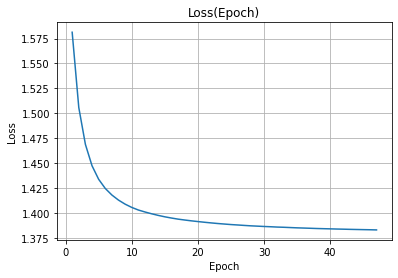

In [2]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_max_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_bool_constr.csv').drop(columns='timestamps')
    y_max_u = y_max_u_bool[utils.cols_with_positive_values(y_max_u_bool)]
    exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])
    X_max_u_bool_train, X_max_u_bool_test, y_max_u_bool_train, y_max_u_bool_test, scaler = utils.split_and_suffle(exogenous_data, y_max_u_bool, test_size=0.2, scaling=True)
    data = {'X_train':X_max_u_bool_train.astype(float),
            'X_test': X_max_u_bool_test.astype(float),
            'y_train':y_max_u_bool_train.astype(float),
            'y_test': y_max_u_bool_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': True
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data).detach().numpy().round().astype(bool)
    prediction = pd.DataFrame(prediction, columns=y_max_u_bool.columns)
    f1_score = sklearn.metrics.f1_score(data['y_test'], prediction, average='micro')
    return f1_score
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_classifier_max_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("value,{}\n".format(trial.value))

## MLP: Regression Sparse Dataset

[I 2022-09-13 23:13:56,806] A new study created in memory with name: no-name-aa40e9ef-9ceb-46a6-a178-9b757cbcff90
[I 2022-09-13 23:17:11,982] Trial 0 finished with value: 0.4975344633619131 and parameters: {'hidden_size': 90, 'n_layers': 3, 'dropout': 0.08474909924547136, 'activation': 'sigmoid', 'optimizer': 'sgd', 'lr': 0.03408450392061506, 'epochs': 74, 'batch_size': 512}. Best is trial 0 with value: 0.4975344633619131.
[I 2022-09-13 23:22:20,305] Trial 1 finished with value: 0.47561071185630355 and parameters: {'hidden_size': 38, 'n_layers': 3, 'dropout': 0.31328776595425356, 'activation': 'tanh', 'optimizer': 'adam', 'lr': 0.0021557479306095542, 'epochs': 98, 'batch_size': 1024}. Best is trial 0 with value: 0.4975344633619131.
[I 2022-09-13 23:25:39,741] Trial 2 finished with value: 0.6411997720618593 and parameters: {'hidden_size': 78, 'n_layers': 3, 'dropout': 0.2780524926860331, 'activation': 'relu', 'optimizer': 'sgd', 'lr': 0.0634688056365508, 'epochs': 80, 'batch_size': 1024

Number of finished trials:  30
Best trial:
  Value: 3.930682106211903
  Params: 
    hidden_size: 27
    n_layers: 2
    dropout: 0.3562510433549009
    activation: relu
    optimizer: sgd
    lr: 0.0017545411149200204
    epochs: 35
    batch_size: 16


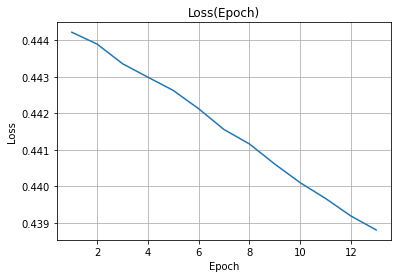

In [3]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_max_u = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_constr.csv').drop(columns='timestamps')
    y_max_u = y_max_u[utils.cols_with_positive_values(y_max_u)]
    exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])
    X_max_u_train, X_max_u_test, y_max_u_train, y_max_u_test, scaler = utils.split_and_suffle(exogenous_data, y_max_u, test_size=0.2, scaling=True)
    data = {'X_train':X_max_u_train.astype(float),
            'X_test': X_max_u_test.astype(float),
            'y_train':y_max_u_train.astype(float),
            'y_test': y_max_u_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': False
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data).detach().numpy()
    prediction = pd.DataFrame(prediction, columns=y_max_u.columns)
    y_max_u_train = pd.DataFrame(y_max_u_train, columns=y_max_u.columns)
    # evaluate the regression performance with my metrics
    threshold = data['y_test'].loc[:, data['y_test'].max(axis=0) != 0].max(axis=0).mean() * 0.1 
    metric = metrics.Metrics()
    metric.get_prediction_scores(prediction, data['y_test'], threshold=threshold)
    return metric.hybrid_f1
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_regressor_max_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("value,{}\n".format(trial.value))

## MLP: Regression Focused Dataset

[I 2022-09-14 00:01:12,334] A new study created in memory with name: no-name-98bd5ef6-41ae-45be-97f0-0340173915c4
[I 2022-09-14 00:01:27,059] Trial 0 finished with value: 0.03794242336500216 and parameters: {'hidden_size': 64, 'n_layers': 3, 'dropout': 0.3254190686515456, 'activation': 'relu', 'optimizer': 'adam', 'lr': 0.00042829084781541944, 'epochs': 48, 'batch_size': 128}. Best is trial 0 with value: 0.03794242336500216.
[I 2022-09-14 00:01:36,243] Trial 1 finished with value: 0.30057436530859905 and parameters: {'hidden_size': 42, 'n_layers': 2, 'dropout': 0.1322457516415078, 'activation': 'relu', 'optimizer': 'sgd', 'lr': 0.0001530102666946297, 'epochs': 48, 'batch_size': 16}. Best is trial 1 with value: 0.30057436530859905.
[I 2022-09-14 00:01:46,139] Trial 2 finished with value: 0.11086550043342226 and parameters: {'hidden_size': 69, 'n_layers': 3, 'dropout': 0.3836677337605887, 'activation': 'tanh', 'optimizer': 'sgd', 'lr': 0.0002316832527881368, 'epochs': 44, 'batch_size': 2

Number of finished trials:  30
Best trial:
  Value: 1.675396870643045
  Params: 
    hidden_size: 22
    n_layers: 1
    dropout: 0.04490211985556538
    activation: tanh
    optimizer: sgd
    lr: 0.00297550353899879
    epochs: 20
    batch_size: 64


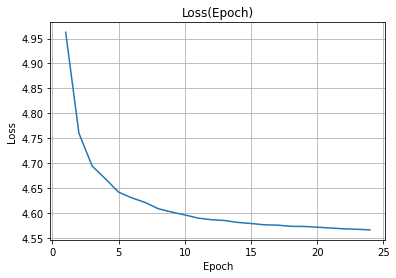

In [4]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_max_u = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_bal_constr.csv')
    exogenous_data = pd.read_csv('..\data\ground_truth\\exogenous_data_vm_pu_max_bal.csv').drop(columns=['date'])
    X_max_u_train, X_max_u_test, y_max_u_train, y_max_u_test, scaler = utils.split_and_suffle(exogenous_data, y_max_u, scaling=True)
    data = {'X_train':X_max_u_train.astype(float),
            'X_test': X_max_u_test.astype(float),
            'y_train':y_max_u_train.astype(float),
            'y_test': y_max_u_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': False
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    # print(model.strategy.model.eval())
    prediction = model.predict(data).detach().numpy()
    prediction = pd.DataFrame(prediction, columns=y_max_u.columns)
    # print('bus_16 prediction: ', prediction['bus_16'])
    y_max_u_train = pd.DataFrame(y_max_u_train, columns=y_max_u.columns)
    # evaluate the regression performance with my metrics
    threshold = y_max_u_train.loc[:, y_max_u_train.max(axis=0) != 0].max(axis=0).mean() * 0.1 
    # print('threshold: ', threshold)
    metric = metrics.Metrics()
    data['y_test'] = pd.DataFrame(data['y_test'], columns=y_max_u.columns)
    # evaluate the regression performance with my metrics
    threshold = data['y_test'].loc[:, data['y_test'].max(axis=0) != 0].max(axis=0).mean() * 0.1 
    metric = metrics.Metrics()
    metric.get_prediction_scores(prediction, data['y_test'], threshold=threshold)
    return metric.hybrid_f1
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_regressor_focused_max_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("value,{}\n".format(trial.value))